<a href="https://colab.research.google.com/github/GabrielChuchuca/SIMULACION/blob/main/Deber2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install simpy

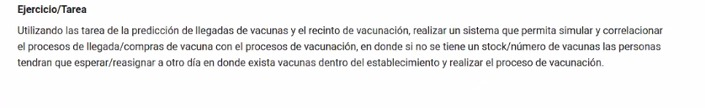

In [3]:
import simpy

In [4]:
def llegada(env, bodega):
  for i in range(1000):
    yield env.timeout(2)
    yield bodega.put(f'vacuna{i}')
    print("Llego la vacuna {} en el tiempo {}".format(i, env.now))

In [5]:
def paciente(nombre, env, bodega):
  while True:
    yield env.timeout(1)
    print("{} se coloca la vacuna en el tiempo {}".format(nombre, env.now))

In [7]:
env = simpy.Environment()
bodega = simpy.Store(env, capacity=1)
llegada = env.process(llegada(env, bodega))
paciente = env.process(paciente("1",env, bodega))
env.run(until=10)

1 se coloca la vacuna en el tiempo 1
1 se coloca la vacuna en el tiempo 2
Llego la vacuna 0 en el tiempo 2
1 se coloca la vacuna en el tiempo 3
1 se coloca la vacuna en el tiempo 4
1 se coloca la vacuna en el tiempo 5
1 se coloca la vacuna en el tiempo 6
1 se coloca la vacuna en el tiempo 7
1 se coloca la vacuna en el tiempo 8
1 se coloca la vacuna en el tiempo 9


In [8]:
def vacuna_insuficiente(env, problemas):
  for problema in [simpy.PriorityItem('P2','#0000'),simpy.PriorityItem('P0','#0001'),simpy.PriorityItem('P3','#0002'),simpy.PriorityItem('P1','#0003')]:
    yield env.timeout(1)
    print("En el tiempo {} se termino las dosis disponibles de las vacunas por razon {}".format(env.now, problema))


In [9]:
def cambio_centro(env,problemas):
  while True:
    problema = yield problemas.get()
    yield env.timeout(3)
    print("Se ha cambiado al paciente {} en el tiempo {}".format(problema, env.now))
    

In [13]:
env = simpy.Environment()
problemas = simpy.PriorityStore(env)
env.process(vacuna_insuficiente(env,problemas))
env.process(cambio_centro(env, problemas))
env.run(until=20)

En el tiempo 1 se termino las dosis disponibles de las vacunas por razon PriorityItem(priority='P2', item='#0000')
En el tiempo 2 se termino las dosis disponibles de las vacunas por razon PriorityItem(priority='P0', item='#0001')
En el tiempo 3 se termino las dosis disponibles de las vacunas por razon PriorityItem(priority='P3', item='#0002')
En el tiempo 4 se termino las dosis disponibles de las vacunas por razon PriorityItem(priority='P1', item='#0003')
